In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
import numpy as np 

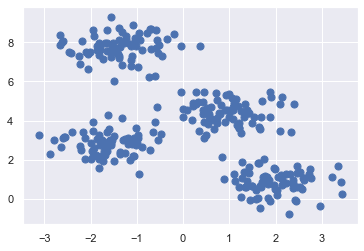

In [2]:
from sklearn.datasets.samples_generator import make_blobs 

X,y_true = make_blobs(n_samples = 300 , centers = 4 , cluster_std = 0.60 , random_state = 0)

plt.scatter(X[:,0],X[:,1],s =50)

In [3]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [4]:
y_kmeans

array([2, 1, 0, 1, 2, 2, 3, 0, 1, 1, 3, 1, 0, 1, 2, 0, 0, 2, 3, 3, 2, 2,
       0, 3, 3, 0, 2, 0, 3, 0, 1, 1, 0, 1, 1, 1, 1, 1, 3, 2, 0, 3, 0, 0,
       3, 3, 1, 3, 1, 2, 3, 2, 1, 2, 2, 3, 1, 3, 1, 2, 1, 0, 1, 3, 3, 3,
       1, 2, 1, 3, 0, 3, 1, 3, 3, 1, 3, 0, 2, 1, 2, 0, 2, 2, 1, 0, 2, 0,
       1, 1, 0, 2, 1, 3, 3, 0, 2, 2, 0, 3, 1, 2, 1, 2, 0, 2, 2, 0, 1, 0,
       3, 3, 2, 1, 2, 0, 1, 2, 2, 0, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 1, 3,
       3, 2, 1, 3, 3, 1, 0, 1, 1, 3, 0, 3, 0, 3, 1, 0, 1, 1, 1, 0, 1, 0,
       2, 3, 1, 3, 2, 0, 1, 0, 0, 2, 0, 3, 3, 0, 2, 0, 0, 1, 2, 0, 3, 1,
       2, 2, 0, 3, 2, 0, 3, 3, 0, 0, 0, 0, 2, 1, 0, 3, 0, 0, 3, 3, 3, 0,
       3, 1, 0, 3, 2, 3, 0, 1, 3, 1, 0, 1, 0, 3, 0, 0, 1, 3, 3, 2, 2, 0,
       1, 2, 2, 3, 2, 3, 0, 1, 1, 0, 0, 1, 0, 2, 3, 0, 2, 3, 1, 3, 2, 0,
       2, 1, 1, 1, 1, 3, 3, 1, 0, 3, 2, 0, 3, 3, 3, 2, 2, 1, 0, 0, 3, 2,
       1, 3, 0, 1, 0, 2, 2, 3, 3, 0, 2, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 2,
       1, 3, 1, 0, 2, 2, 1, 1, 1, 2, 2, 0, 1, 3])

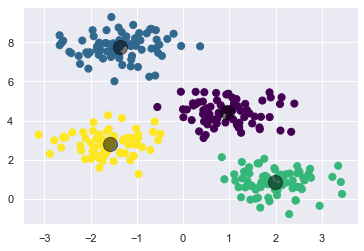

In [5]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X,n_clusters , rseed = 2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    
    while True:
        # 2a . Assign labels based on closest centers 
        labels = pairwise_distances_argmin(X , centers)
        
        # 2b . Find new centers from means of points 
        new_centers = np.array([X[labels == i].mean(0) 
                               for i in range(n_clusters)])
                               
        #2c Check for convergence 
        if np.all(centers == new_centers):
            break
        centers = new_centers 
                               
    return centers , labels
                               
                                                              
centers , labels = find_clusters(X,4)
plt.scatter(X[:,0],X[:,1] , c = y_kmeans ,s = 50 ,cmap = 'viridis')
                               
plt.scatter(centers[:,0] , centers[:,1] , c = 'black' , s = 200 , alpha = 0.5)

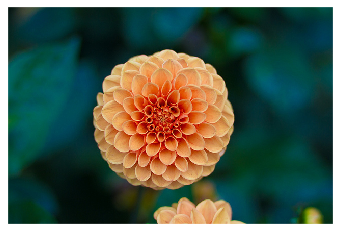

In [6]:
from sklearn.datasets import load_sample_image 
china = load_sample_image('flower.jpg')
ax = plt.axes(xticks = [] , yticks = [])
ax.imshow(china)

In [7]:
china.shape

(427, 640, 3)

In [8]:
data = china/255.0
data = data.reshape(427*640,3)
data.shape

(273280, 3)

In [9]:
def plot_pixels(data, title , colors = None , N = 10000):
    if colors is None:
        colors = data 
        
    #Choose a random subset 
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R,G,B = data[i].T
    
    fig,ax = plt.subplots(1,2,figsize=(16,6))
    ax[0].scatter(R,G,color = colors , marker = '.')
    ax[0].set(xlabel = 'Red' , ylabel = 'Green' , xlim=(0,1) , ylim=(0,1))
    
    ax[1].scatter(R,B,color = colors , marker = '.')
    ax[1].set(xlabel = 'Red' , ylabel = 'Blue', xlim=(0,1),ylim=(0,1))
    
    fig.suptitle(title, size = 20)

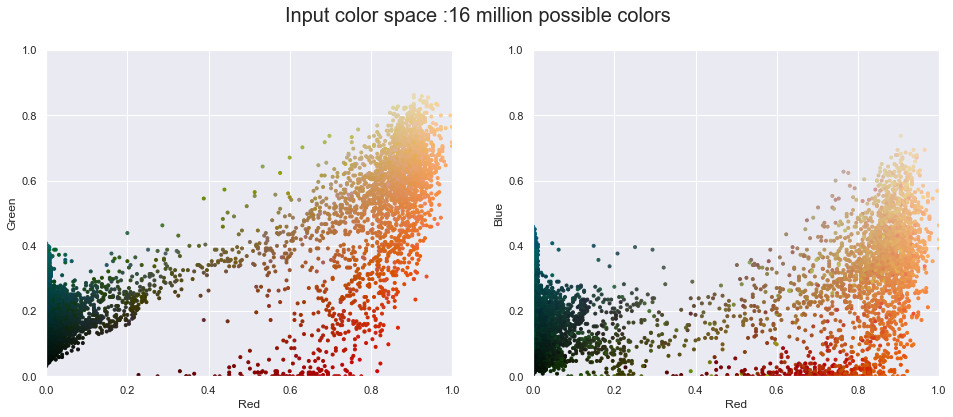

In [10]:
plot_pixels(data, title = 'Input color space :16 million possible colors')

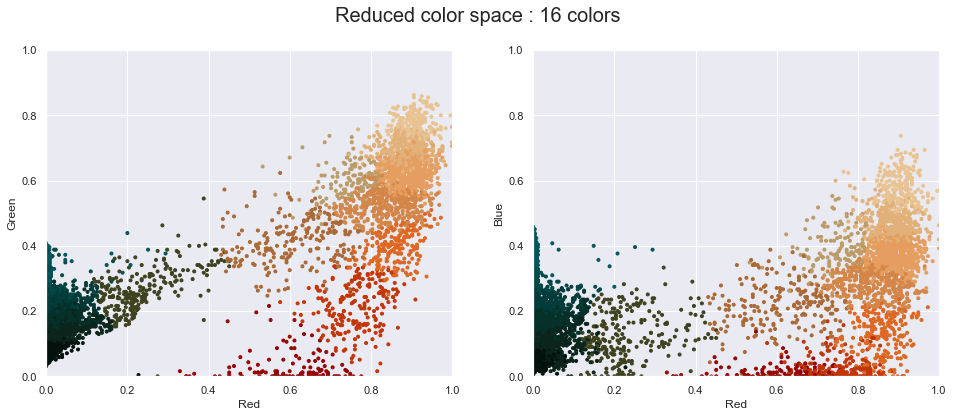

In [11]:
import warnings 
warnings.simplefilter('ignore')

from sklearn.cluster import MiniBatchKMeans 
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data,colors = new_colors , title = 'Reduced color space : 16 colors')

Text(0.5, 1.0, '16-color Image')

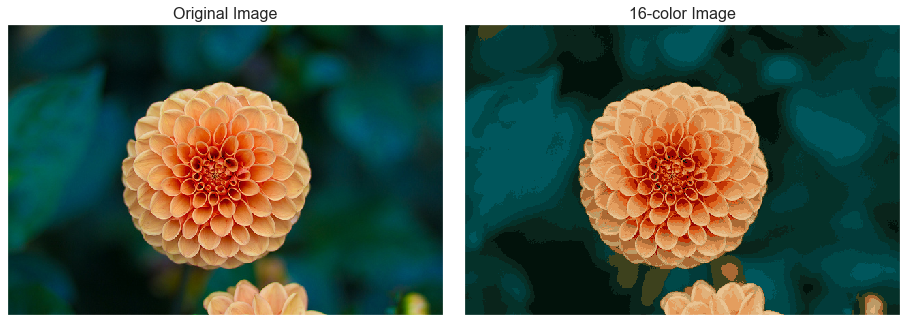

In [12]:
china_recolored = new_colors.reshape(china.shape)

fig,ax = plt.subplots(1,2,figsize=(16,6) , subplot_kw = dict(xticks = [] , yticks=[]))
fig.subplots_adjust(wspace = 0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image' , size = 16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image' , size = 16)

# Example - 2 

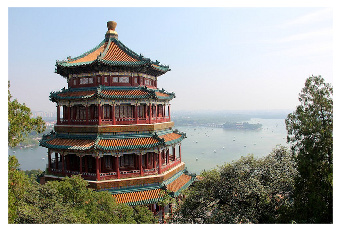

In [13]:
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')
ax = plt.axes(xticks = [] , yticks = [])
ax.imshow(china)

In [14]:
china.shape

(427, 640, 3)

In [15]:
data = china/255.0
data = data.reshape(427*640,3)
data.shape

(273280, 3)

In [16]:
def plot_pixels(data, title , colors = None , N = 10000):
    if colors is None:
        colors = data 
        
    #Choose a random subset 
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R,G,B = data[i].T
    
    fig,ax = plt.subplots(1,2,figsize=(16,6))
    ax[0].scatter(R,G,color = colors , marker = '.')
    ax[0].set(xlabel = 'Red' , ylabel = 'Green' , xlim=(0,1) , ylim=(0,1))
    
    ax[1].scatter(R,B,color = colors , marker = '.')
    ax[1].set(xlabel = 'Red' , ylabel = 'Blue', xlim=(0,1),ylim=(0,1))
    
    fig.suptitle(title, size = 20)

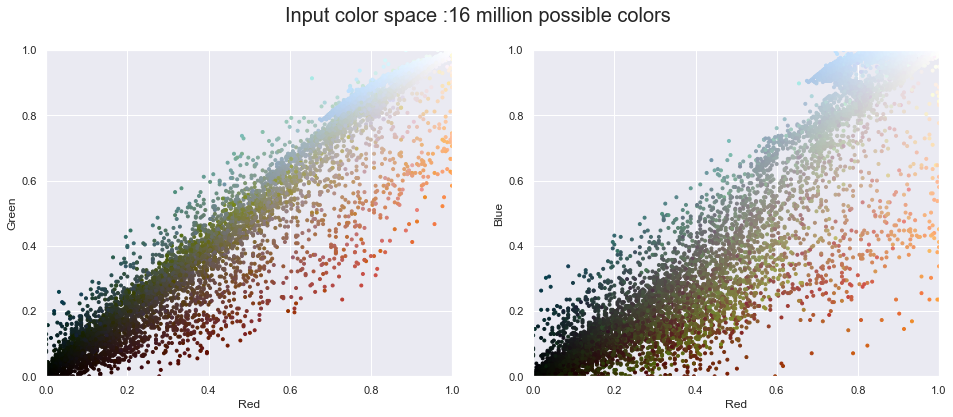

In [17]:
plot_pixels(data, title = 'Input color space :16 million possible colors')

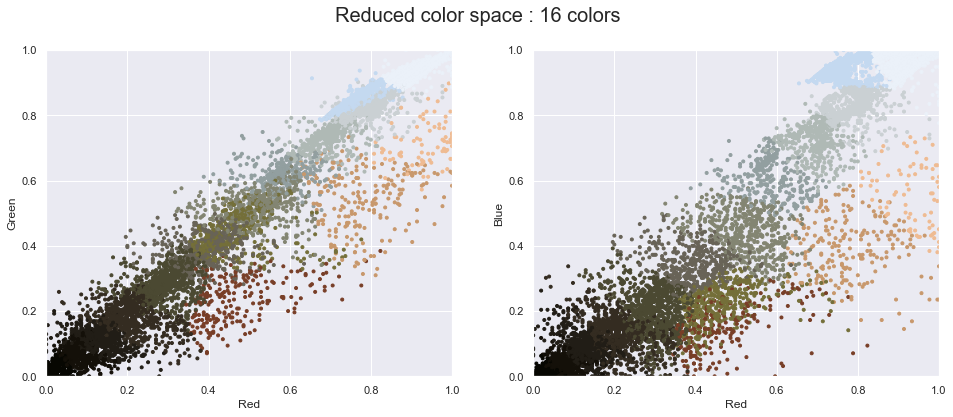

In [18]:
import warnings 
warnings.simplefilter('ignore')

from sklearn.cluster import MiniBatchKMeans 
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data,colors = new_colors , title = 'Reduced color space : 16 colors')

Text(0.5, 1.0, '16-color Image')

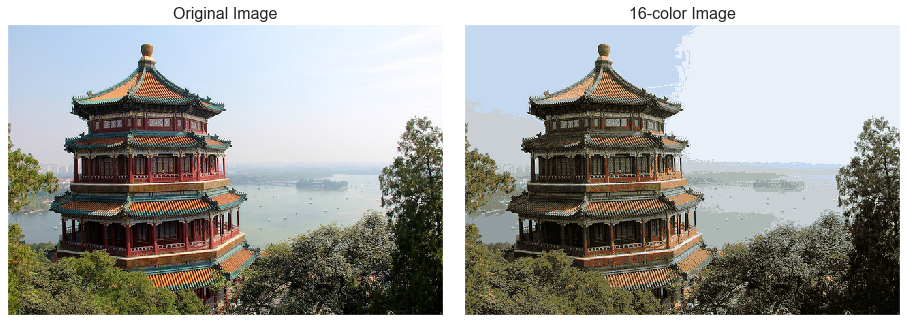

In [19]:
china_recolored = new_colors.reshape(china.shape)

fig,ax = plt.subplots(1,2,figsize=(16,6) , subplot_kw = dict(xticks = [] , yticks=[]))
fig.subplots_adjust(wspace = 0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image' , size = 16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image' , size = 16)